In [1]:
import pandas as pd
import os
from src.model_acquisition import ModelAcquisition
from src.feature_extraction_new import FeatureExtractor, CoverDataAugmentation, SteganalysisSpecificFeatures, AdvancedFeatureExtractor
from src.feature_selection import PSOFeatureSelection
from src.classifier import StegoClassifier
from src.config import config

print("Starting AI Model Steganalysis Research...")


Using device: cpu
Starting AI Model Steganalysis Research...


#### Step 1: Model Acquisition

In [2]:
print("\n=== Step 1: Model Acquisition ===")
model_acquirer = ModelAcquisition()
original_models = model_acquirer.download_pretrained_models()


=== Step 1: Model Acquisition ===


#### # Step 2: Stego Model Creation

In [3]:
from src.stego_generator import StegoGenerator
print("\n=== Step 2: Stego Model Creation ===")
# injector = StegoInjector()
generetor = StegoGenerator()
stego_models = generetor.create_stego_models(original_models)


=== Step 2: Stego Model Creation ===
Using device: cpu

=== Membuat stego models untuk resnet50 ===
Proses: resnet50_rate_0.001_bit_0


c:\Users\oktan\OneDrive\Documents\KAMPUS\Kuliah\Semester 4\THESIS\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\src\stego_generator.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_0
Proses: resnet50_rate_0.001_bit_1
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_1
Proses: resnet50_rate_0.001_bit_2
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_2
Proses: resnet50_rate_0.001_bit_3
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_3
Proses: resnet50_rate_0.001_bit_4
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_4
Proses: resnet50_rate_0.005_bit_0
✓ Stego model sudah ada, load dari file: resnet50_rate_0.005_bit_0
Proses: resnet50_rate_0.005_bit_1
✓ Stego model sudah ada, load dari file: resnet50_rate_0.005_bit_1
Proses: resnet50_rate_0.005_bit_2
✓ Stego model sudah ada, load dari file: resnet50_rate_0.005_bit_2
Proses: resnet50_rate_0.005_bit_3
✓ Stego model sudah ada, load dari file: resnet50_rate_0.005_bit_3
Proses: resnet50_rate_0.005_bit_4
✓ Stego model sudah ada, load dari file: resnet50_rate_0.005_bit_4
Proses: resnet50_rate_0.

#### # Step 3: Feature Extraction & Combine Feature

In [4]:
feature_extractor = FeatureExtractor()
all_features = []

Test data prepared successfully


##### # Extract features from cover models

In [5]:
# Extract features from cover models
for model_name, model in original_models.items():
    features = feature_extractor.extract_all_features(model, model_name, "cover")
    all_features.append(features)

Extracting features for resnet50...
  Extracted 2000 weight samples
Autoencoder trained successfully
  Reconstruction loss: 0.013725
  Gradient features: {'grad_mean': 1.371105670512463, 'grad_std': 1.9224363398634448, 'grad_max': 8.776126861572266}
  Entropy features calculated for 4 bit-planes
Extracting features for mobilenet_v3_small...
  Extracted 2000 weight samples
  Reconstruction loss: 0.226317
  Gradient features: {'grad_mean': 8.214062428390475, 'grad_std': 10.256855703503692, 'grad_max': 97.57024383544922}
  Entropy features calculated for 4 bit-planes


##### # Extract features from stego models

In [6]:
for model_name, model in stego_models.items():
    features = feature_extractor.extract_all_features(model, model_name, "stego")
    all_features.append(features)

Extracting features for resnet50_rate_0.001_bit_0...
  Extracted 2000 weight samples
  Reconstruction loss: 0.013449
  Gradient features: {'grad_mean': 1.2949586129799393, 'grad_std': 1.8347539479940147, 'grad_max': 8.157705307006836}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_1...
  Extracted 2000 weight samples
  Reconstruction loss: 0.014496
  Gradient features: {'grad_mean': 1.412944710495309, 'grad_std': 1.9868201007222166, 'grad_max': 9.600602149963379}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_2...
  Extracted 2000 weight samples
  Reconstruction loss: 0.012504
  Gradient features: {'grad_mean': 1.3197935986685456, 'grad_std': 1.8516841822337224, 'grad_max': 8.240976333618164}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_3...
  Extracted 2000 weight samples
  Reconstruction loss: 0.010414
  Gradient features: {'grad_mean': 1.3

##### # Create features DataFrame

In [7]:
features_df = pd.DataFrame(all_features)
features_path = os.path.join(config.DATA_DIR, "features", "all_features.csv")
features_df.to_csv(features_path, index=False)
print(f"Features saved to {features_path}")

Features saved to c:\Users\oktan\OneDrive\Documents\KAMPUS\Kuliah\Semester 4\THESIS\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\data\features\all_features.csv


In [8]:
loaded_df = pd.read_csv(features_path)
print("Loaded DataFrame shape:", loaded_df.head())


Loaded DataFrame shape:    weight_mean  weight_std  weight_skew  weight_kurtosis  reconstruction_loss  \
0    -0.005739    0.126202    -0.477614        20.716181             0.013725   
1    -0.000340    0.483784    -0.358093        12.634875             0.226317   
2    -0.004980    0.122714    -0.338152        38.371468             0.013449   
3     0.001560    0.126650     0.428820        16.999048             0.014496   
4    -0.003620    0.124363    -0.491215        16.985434             0.012504   

   grad_mean   grad_std   grad_max  entropy_bit_0  entropy_bit_1  \
0   1.371106   1.922436   8.776127       0.990605       0.995378   
1   8.214062  10.256856  97.570244       0.977539       0.996046   
2   1.294959   1.834754   8.157705       0.988517       0.996046   
3   1.412945   1.986820   9.600602       0.980511       0.993342   
4   1.319794   1.851684   8.240976       0.976500       0.998196   

   entropy_bit_2  entropy_bit_3                 model_name model_type  \
0      

#### # Step 4: Feature Selection with PSO

In [9]:
print("\n=== Step 4: Feature Selection with PSO ===")
classifier = StegoClassifier()
X, y = classifier.prepare_data(features_df)

pso_selector = PSOFeatureSelection()
feature_mask, best_score = pso_selector.optimize(X, y)


=== Step 4: Feature Selection with PSO ===
Starting PSO feature selection with 12 features...


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 10/20, Best F1: 0.9787


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 20/20, Best F1: 0.9795
PSO completed. Best F1-score: 0.9795
Selected 1 out of 12 features


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


#### # Step 5: Model Training and Evaluation


=== Step 5: Model Training and Evaluation ===
Using 1 selected features

Training random_forest...

random_forest Performance:
Accuracy: 0.9375
Precision: 0.9375
Recall: 1.0000
F1_score: 0.9677


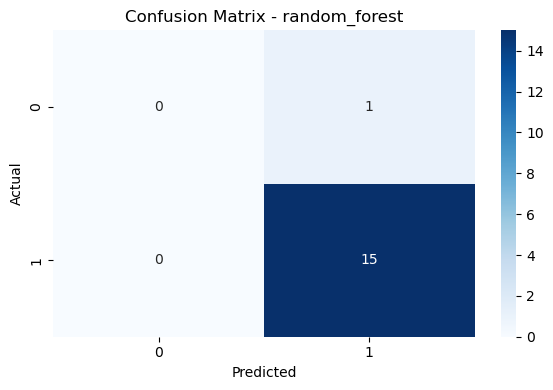


Training gradient_boosting...

gradient_boosting Performance:
Accuracy: 0.9375
Precision: 0.9375
Recall: 1.0000
F1_score: 0.9677


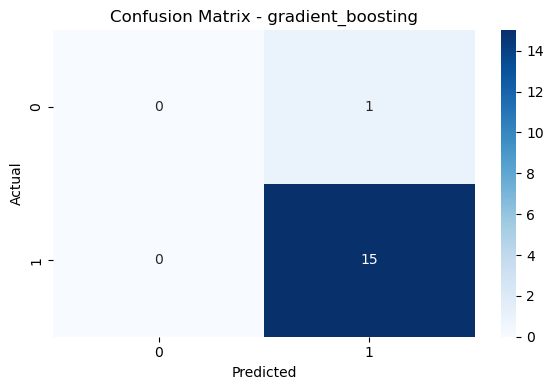


Training svm...

svm Performance:
Accuracy: 0.9375
Precision: 0.9375
Recall: 1.0000
F1_score: 0.9677


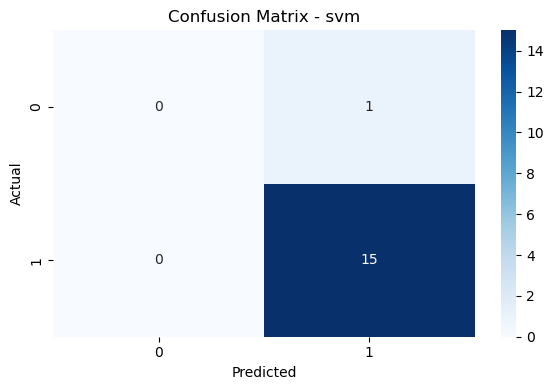


Best model: random_forest


In [10]:
print("\n=== Step 5: Model Training and Evaluation ===")
results, best_model = classifier.train_and_evaluate(features_df, feature_mask)

#### # Save the best model

In [11]:
classifier.save_model(best_model)

print("\n=== Research Completed ===")
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: F1-Score = {metrics['f1_score']:.4f}")

Model saved to c:\Users\oktan\OneDrive\Documents\KAMPUS\Kuliah\Semester 4\THESIS\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\models\trained\best_stego_classifier.pkl

=== Research Completed ===
Summary of Results:
random_forest: F1-Score = 0.9677
gradient_boosting: F1-Score = 0.9677
svm: F1-Score = 0.9677


## With Feature Balancing

In [18]:
balancing_all_features = []

In [ ]:

def create_balanced_dataset(original_models, stego_models):
    """Create balanced dataset with augmented cover models"""
    
    # Step 1: Augment cover models
    augmentor = CoverDataAugmentation()
    augmented_covers = augmentor.create_augmented_cover_models(original_models, num_augmentations=50)
    
    # Step 2: Extract features with advanced extractor
    feature_extractor = AdvancedFeatureExtractor()
    stego_specific_extractor = SteganalysisSpecificFeatures()
    
    all_features_result = []
    
    # Extract from original cover models
    for model_name, model in original_models.items():
        print(f"Extracting features from original cover: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "cover")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
    
    # Extract from augmented cover models
    for model_name, model in augmented_covers.items():
        print(f"Extracting features from augmented cover: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "cover")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
    
    # Extract from stego models (balanced sampling)
    stego_count = 0
    max_stego_samples = len(all_features_result)  # Balance with cover samples
    
    for model_name, model in stego_models.items():
        if stego_count >= max_stego_samples:
            break
            
        print(f"Extracting features from stego: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "stego")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
        stego_count += 1
    
    return all_features_result

In [ ]:
balanced_feature = create_balanced_dataset(original_models, stego_models)

Creating augmented cover models for resnet50...
Creating augmented cover models for mobilenet_v3_small...
Test data prepared successfully
Extracting features from original cover: resnet50
Extracting features for resnet50...
  Extracted 2000 weight samples
Autoencoder trained successfully
  Reconstruction loss: 0.015099
  Gradient features: {'grad_mean': 1.339028199359497, 'grad_std': 1.8302523082054434, 'grad_max': 8.323780059814453}
  Entropy features calculated for 4 bit-planes
Extracting features from original cover: mobilenet_v3_small
Extracting features for mobilenet_v3_small...
  Extracted 2000 weight samples
  Reconstruction loss: 0.308775
  Gradient features: {'grad_mean': 7.501806946077817, 'grad_std': 7.8502993661874765, 'grad_max': 58.03547668457031}
  Entropy features calculated for 4 bit-planes
Extracting features from augmented cover: resnet50_cover_aug_0
Extracting features for resnet50_cover_aug_0...
  Extracted 2000 weight samples
  Reconstruction loss: 0.020707
  Grad

,weight_mean,weight_std,weight_skew,weight_kurtosis,reconstruction_loss,grad_mean,grad_std,grad_max,entropy_bit_0,entropy_bit_1,...,spectral_entropy_mean,spectral_entropy_std,bit_transition_mean,bit_transition_std,spatial_corr_mean,spatial_corr_std,total_params,param_density,complexity_mean,complexity_std
0,-0.007517,0.128336,-2.102005,17.747393,0.015099,1.339028,1.830252,8.323780,0.974352,0.991880,...,6.831149,0.000000,0.478044,0.102547,0.250018,0.703420,25557032,24.373085,484.954285,503.411438
1,0.023036,0.498114,1.057865,12.941244,0.308775,7.501807,7.850299,58.035477,0.986617,0.992184,...,6.425920,0.190640,0.472728,0.102111,0.360960,0.742278,2542856,2.425056,657.310425,1556.948975
2,-0.003779,0.130397,0.819984,32.395035,0.020707,10.589272,64.638562,600.570557,0.969769,0.993886,...,6.831359,0.000000,0.475593,0.102142,0.221185,0.709738,25557032,24.373085,496.799469,515.503418
3,-0.003457,0.140878,-0.276478,29.318735,0.022894,2.957283,14.822547,150.933167,0.983269,0.994904,...,6.831311,0.000000,0.478052,0.102543,0.249525,0.703575,25557032,24.373085,487.157990,505.583069
4,-0.006134,0.125818,-2.035576,22.364513,0.016129,42.554937,185.494582,1731.897705,0.972109,0.997043,...,6.831114,0.000000,0.475402,0.102367,0.191753,0.714414,25557032,24.373085,532.185913,553.101013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.005208,0.505059,0.211149,9.450910,0.286289,5.922885,6.476585,52.988186,0.985405,0.998337,...,6.426689,0.190816,0.472780,0.102112,0.359480,0.737187,2542856,2.425056,670.968506,1586.662476
148,-0.000119,0.486976,-0.314787,14.444506,0.290766,4.733654,4.151184,22.256491,0.987008,0.995378,...,6.426173,0.190724,0.472819,0.102006,0.359004,0.740926,2542856,2.425056,660.449097,1564.457153
149,0.001014,0.468573,0.018165,7.064136,0.243939,8.126955,13.016577,141.301498,0.983269,0.989237,...,6.425974,0.190659,0.472775,0.102084,0.360204,0.741804,2542856,2.425056,658.125122,1559.024902
150,-0.009062,0.511045,-0.221204,14.775971,0.317166,6.870224,7.468127,54.387295,0.984569,0.999261,...,6.425934,0.190655,0.472717,0.102088,0.361234,0.742109,2542856,2.425056,657.483337,1557.455200


In [ ]:
balancing_all_features.append(balanced_feature)

In [ ]:
features_df_balanced = pd.DataFrame(balancing_all_features)
new_features_path = os.path.join(config.DATA_DIR, "features", "all_features_with_balacing.csv")
features_df_balanced.to_csv(new_features_path, index=False)
print(f"Features saved to {new_features_path}")

Features saved to c:\Users\oktan\OneDrive\Documents\KAMPUS\Kuliah\Semester 4\THESIS\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\data\features\all_features_with_balacing.csv


In [15]:
loaded_df = pd.read_csv(new_features_path)
print("Loaded DataFrame shape:", loaded_df.head())

Loaded DataFrame shape:    weight_mean  weight_std  weight_skew  weight_kurtosis  reconstruction_loss  \
0    -0.005739    0.126202    -0.477614        20.716181             0.013725   
1    -0.000340    0.483784    -0.358093        12.634875             0.226317   
2    -0.004980    0.122714    -0.338152        38.371468             0.013449   
3     0.001560    0.126650     0.428820        16.999048             0.014496   
4    -0.003620    0.124363    -0.491215        16.985434             0.012504   

   grad_mean   grad_std   grad_max  entropy_bit_0  entropy_bit_1  \
0   1.371106   1.922436   8.776127       0.990605       0.995378   
1   8.214062  10.256856  97.570244       0.977539       0.996046   
2   1.294959   1.834754   8.157705       0.988517       0.996046   
3   1.412945   1.986820   9.600602       0.980511       0.993342   
4   1.319794   1.851684   8.240976       0.976500       0.998196   

   entropy_bit_2  entropy_bit_3                 model_name model_type  \
0      

In [16]:
print("\n=== Step 4: Feature Selection with PSO ===")
classifier = StegoClassifier()
X, y = classifier.prepare_data(features_df_balanced)

pso_selector = PSOFeatureSelection()
feature_mask_balanced, best_score = pso_selector.optimize(X, y)


=== Step 4: Feature Selection with PSO ===
Starting PSO feature selection with 12 features...


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 10/20, Best F1: 0.9787


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 20/20, Best F1: 0.9795
PSO completed. Best F1-score: 0.9795
Selected 1 out of 12 features


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
print("\n=== Step 5: Model Training and Evaluation ===")
results, best_model = classifier.train_and_evaluate(features_df_balanced, feature_mask_balanced)